# Hyderabad Housing Market Analysis
This project analyzes the Hyderabad Housing dataset to better understand property trends and key housing features. Our goal is to generate a consistent workflow that mirrors the SQL version of this assignment while also demonstrating Python-based data engineering and preprocessing.
#### Scott Schmidt - Illinois State U - IT 478

--------------------------------------------
# View Data - Step 1
Data Source: "HyderabadHousingPrices.csv", containing detailed information about housing prices and features in Hyderabad. Perform data cleaning on the HYDERABAD_HOUSING table, ensuring standardization of formats for fields such as Area, No_of_Bedrooms, New_Resale, Gym, and Price.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

df = pd.read_excel('/kaggle/input/houseprice/HyderabadHousingPrices.xlsx')
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


--------------------------------------------
# Data Cleaning - Part 2
Perform data cleaning such as following:
* Handling missing or null values
* Ensuring numeric fields are properly typed
* Standardizing categorical variables
* Removing duplicate entries
* Verifying consistency across all feature columns

In [2]:
df_shape = df.shape
print("Original data shape: ", df_shape)

dups_count = df.duplicated().sum()
print("There are this many dups: ", dups_count)

Original data shape:  (2518, 40)
There are this many dups:  520


In [3]:
df = df.drop_duplicates()
df_shape = df.shape
df_shape

(1998, 40)

----------------------------
# House Features - Part 3
Create a table named HOUSE_FEATURES that includes the following columns from
HYDERABAD_HOUSING: Area, No_of_Bedrooms, Gym, Lift, SwimmingPool, and Resale.

In [4]:
#Column list
cols = df.columns
df = df[cols]  

# 1. Split target & features
y = df["Price"]
X = df.drop(columns=["Price"])

# Identify categorical & numeric columns
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
numeric_cols = X.select_dtypes(exclude=["object", "category"]).columns

In [5]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

# 3. Linear Regression Model
lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [6]:
# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [7]:
lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Location'], dtype='object')),
                                                 ('num', 'passthrough',
                                                  Index(['Area', 'No. of Bedrooms', 'Resale', 'MaintenanceStaff', 'Gymnasium',
       'SwimmingPool', 'LandscapedGardens', 'JoggingTrack',
       'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom',
       '...se', 'School', '24X7Security',
       'PowerBackup', 'CarParking', 'StaffQuarter', 'Cafeteria',
       'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
       'Wifi', 'Children'splayarea', 'LiftAvailable', 'BED', 'VaastuCompliant',
       'Microwave', 'GolfCourse', 'TV', 'DiningTable', 'Sofa', 'Wardrobe',
       'Refrigerator'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

R² tells you how well your model’s predictions match the real data.
* R² = 1.0 → perfect predictions
* R² = 0.0 → the model is useless (no better than guessing the average)
Therefore, .82 means one can explain about 82% of the data.

In [8]:
#Results
r2 = lr.score(X_test, y_test)
r2 = round(r2, 4)
print("R² score:", r2)

R² score: 0.8181


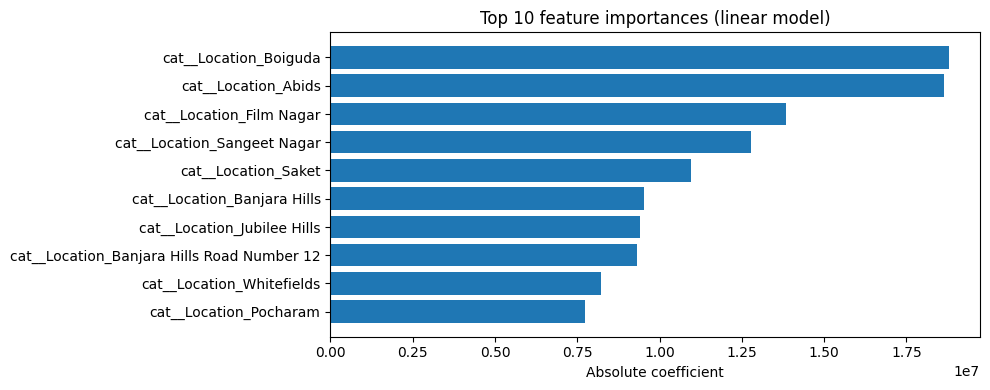

In [9]:
# print(lr.named_steps.keys()) # See the actual step names 
feature_names = lr.named_steps['preprocessor'].get_feature_names_out()
coeffs = np.abs(lr.named_steps['regressor'].coef_)

top_n = 10  # change to 6 if you want only six
top_idx = np.argsort(coeffs)[-top_n:]
top_features = feature_names[top_idx]
top_values = coeffs[top_idx]

plt.figure(figsize=(10, 4))
plt.barh(top_features, top_values)
plt.xlabel("Absolute coefficient")
plt.title(f"Top {top_n} feature importances (linear model)")
plt.tight_layout()
plt.show()

--------------------------------------------
## Price Analysis - Part 4
* Define and populate the PRICE_ANALYSIS table with the following columns:
* AverageArea: The average area of houses sold.
* MedianPrice: The median price of houses.
* TotalHousesSold: The total number of houses sold.
* Use SQL functions such as AVG, MEDIAN, COUNT for calculations.


In [10]:
average_price = df['Price'].mean().round(2)
median_price = df['Price'].median()
total_houses_sold = len(df)
print(average_price, " average price")
print(median_price, " median price")
print(total_houses_sold, " houses sold")

10141268.24  average price
7873500.0  median price
1998  houses sold


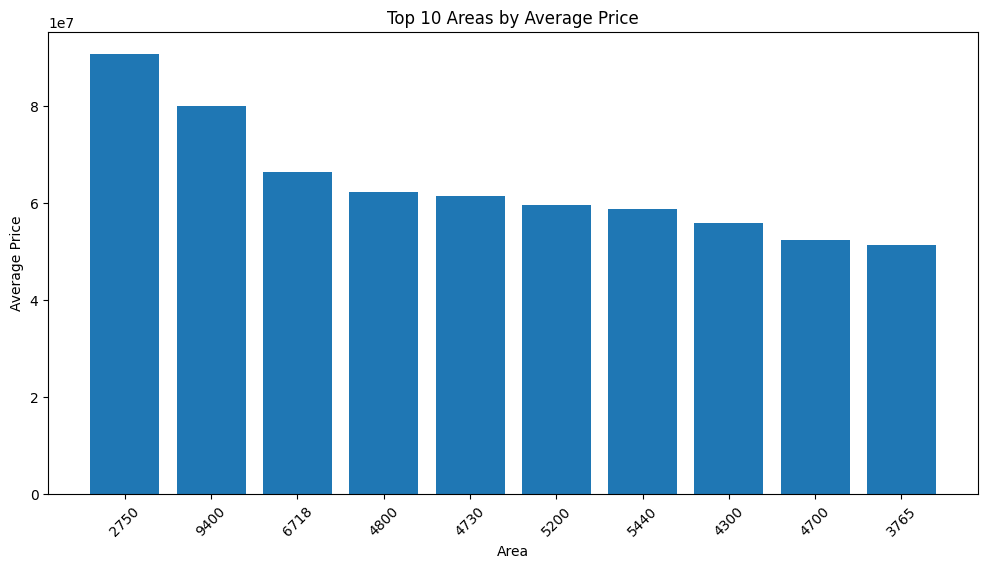

In [11]:
# Group by 'Area' and calculate mean price
area_stats = df.groupby('Area')['Price'].mean().sort_values(ascending=False)

# Top 10 areas by average price
top_areas = area_stats.head(10).reset_index()

#Graph
plt.figure(figsize=(12,6))
plt.bar(top_areas['Area'].astype(str), top_areas['Price'])
plt.xticks(rotation=45)
plt.xlabel('Area')
plt.ylabel('Average Price')
plt.title('Top 10 Areas by Average Price')
plt.show()

-----------------------------------------------
# Export DDL and Data - Part 5 
Export the DDL and data for both the HOUSE_FEATURES and PRICE_ANALYSIS tables.

In [12]:
df.to_csv('house_features.csv', index=False)
print("CSV exported as house_features.csv")

CSV exported as house_features.csv


--------------------------------
# Export File - Part 6
Export the data from the PRICE_ANALYSIS table into an Excel file.

In [13]:
average_price = df['Price'].mean().round(2)
median_price = df['Price'].median()
total_houses_sold = len(df)

# Create a DataFrame for export
summary_df = pd.DataFrame({
    'average_price': [average_price],
    'median_price': [median_price],
    'total_houses_sold': [total_houses_sold]
})

# Export to CSV
summary_df.to_csv('house_summary.csv', index=False)
print("CSV exported as house_summary.csv")

CSV exported as house_summary.csv


-------------------------------------------
# Generate Schema Report - Part 7
The purpose of this Python version is to extend the existing housing dataset by creating a dedicated PRICE_ANALYSIS table to store valuation metrics for each property, linked to the house features already present in the Kaggle dataset.